In [1]:
from optimum.intel.openvino import OVStableDiffusionPipeline
prompt = "sailing ship in storm by Rembrandt"
model_id = "runwayml/stable-diffusion-v1-5"
ov_pipe = OVStableDiffusionPipeline.from_pretrained("/home/alex/work/experimental/stable_diffusion_quantization/ov_pipeline")
ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
ov_pipe.compile()
print("Done")

/home/alex/work/optimum-intel/.venv/lib/python3.8/site-packages/openvino/offline_transformations/__init__.py:10: FutureWarning: The module is private and following namespace `offline_transformations` will be removed in the future.
  warnings.warn(


INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


The config attributes {'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker']} were passed to OVStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...


Done


In [2]:
output = ov_pipe(prompt, num_inference_steps=50, output_type="pil")

  0%|          | 0/51 [00:00<?, ?it/s]

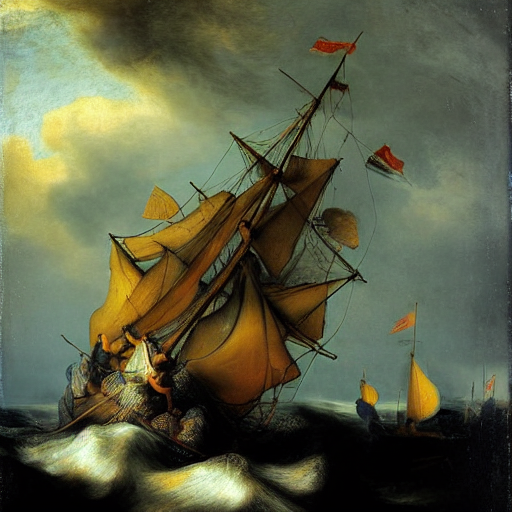

In [3]:
from IPython.display import Image, display

display(output.images[0])

In [4]:
q_ov_pipe = OVStableDiffusionPipeline.from_pretrained("/home/alex/work/experimental/stable_diffusion_quantization/sd_nncf_ov_alt") #q_ov_pipeline
q_ov_pipe.reshape(batch_size=1, height=512, width=512, num_images_per_prompt=1)
q_ov_pipe.compile()
print("Done")

The config attributes {'requires_safety_checker': True, 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker']} were passed to OVStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...
Compiling the encoder and creating the inference request ...


Done


In [5]:
output = q_ov_pipe(prompt, num_inference_steps=50, output_type="pil")

Compiling the encoder and creating the inference request ...


  0%|          | 0/51 [00:00<?, ?it/s]

Compiling the encoder and creating the inference request ...


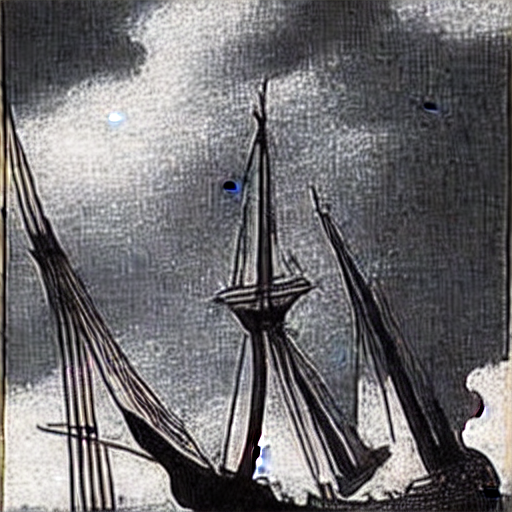

In [ ]:
display(output.images[0])